In [144]:
# Data Collection
# 1. Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2. Importing the dataset
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [145]:
# Exploratory Data Analysis
# 1. Checking for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [146]:
# Replace missing values with mean
df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

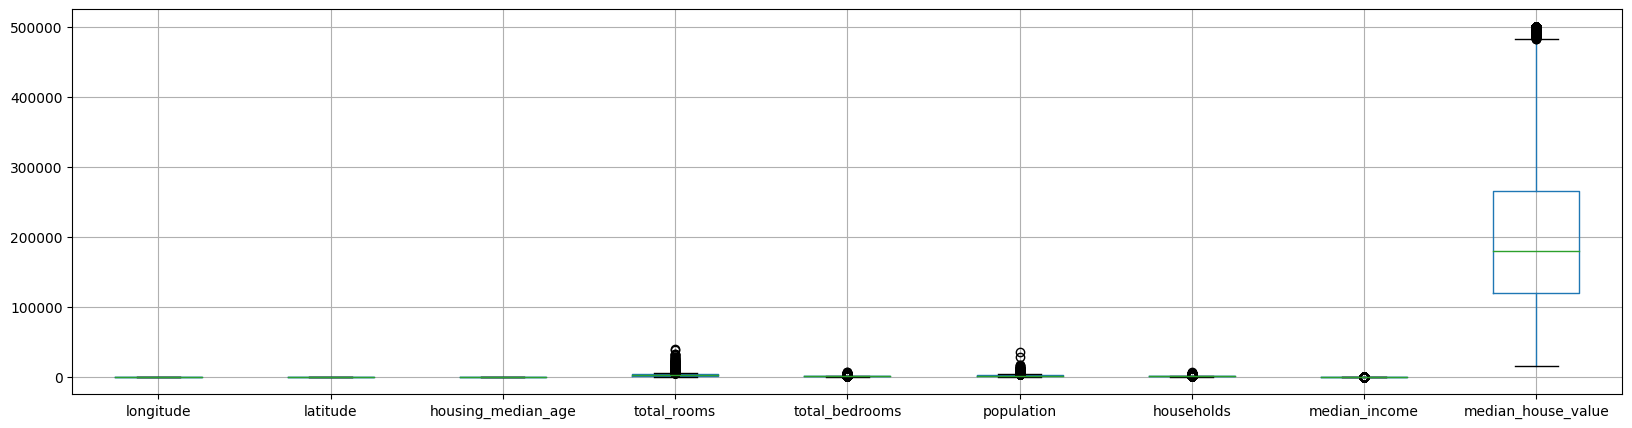

In [147]:
# 2. Checking for outliers
df.boxplot(figsize=(20, 5))
plt.show()

In [148]:
# Dynamically remove outliers
def remove_outliers(df,col):
  #handle non numeric columns
  if df[col].dtype == 'object':
    return df
  #based on standard deviation
  mean = df[col].mean()
  std = df[col].std()
  df = df[(df[col] > mean - 3* std) & (df[col] < mean + 3* std)]
  return df

for col in df.columns:
  df = remove_outliers(df,col)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


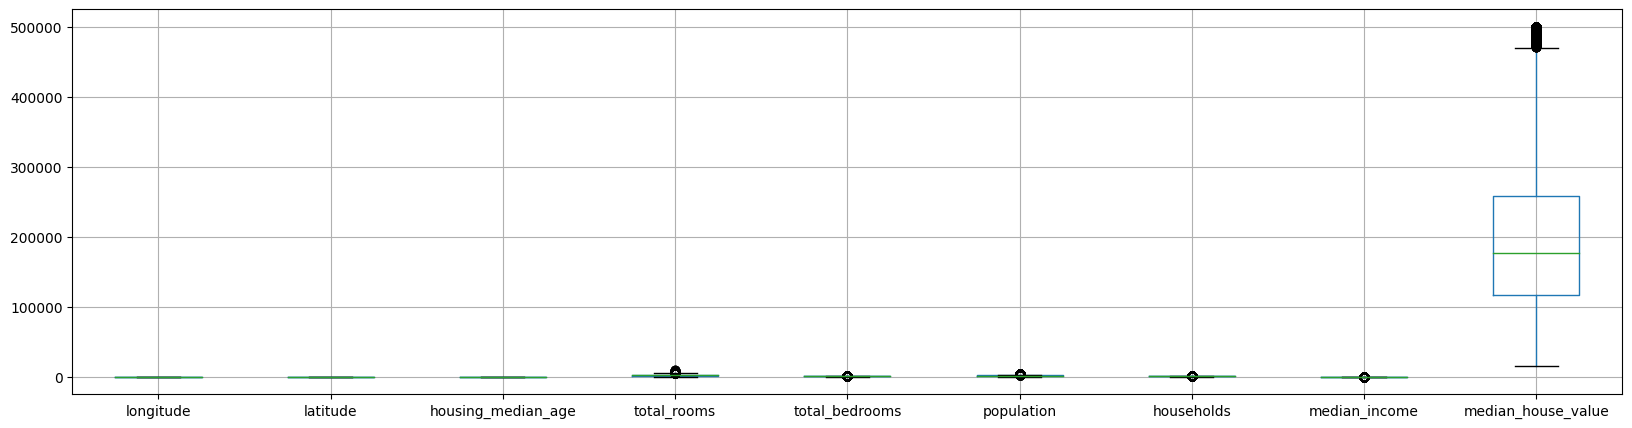

In [149]:
df.boxplot(figsize=(20, 5))
plt.show()

In [150]:
# Data Wrangling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# 1. Encoding categorical data
# Encoding ocean_proximity
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
#print label encoder classes
print(labelencoder.classes_)


['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [151]:
# 2. Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X =df.drop(['median_house_value'],axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [152]:
# 3. Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [153]:
# Model Building
# 1. Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# 2. Predicting the Test set results
y_pred = regressor.predict(X_test)
# 3. Evaluating the Model Performance
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error: 65492.37921793703


In [154]:
# Plot the predicted values against the actual values
temp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}).reset_index(drop=True)
temp

,Actual,Predicted
0,118800.0,109205.114190
1,65000.0,25814.036118
2,234400.0,292565.449770
3,500001.0,41721.681724
4,246900.0,306190.390759
...,...,...
3813,205900.0,161045.588979
3814,111400.0,156991.145346
3815,132300.0,78545.166764
3816,236400.0,226510.463040


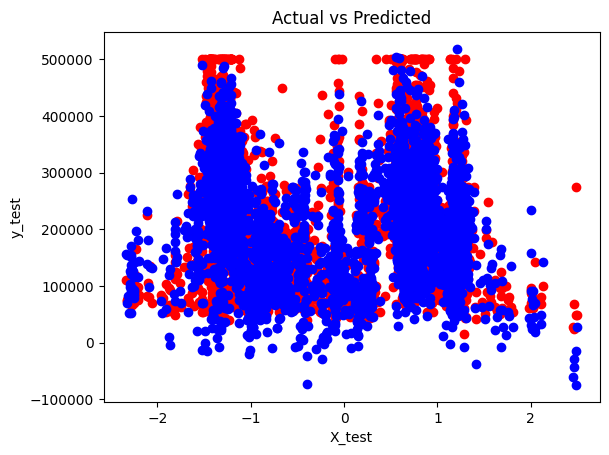

In [155]:
# Plot x_test vs y_test and y_pred in the same plot
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.scatter(X_test[:,0], y_pred, color = 'blue')
plt.title('Actual vs Predicted')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()

In [159]:
# Model Building
# 1. Fitting Multiple SVR to the Training set
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train)
# 2. Predicting the Test set results
y_pred = regressor.predict(X_test)
# 3. Evaluating the Model Performance
print('Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))


Mean Squared Error: 112046.02604315593


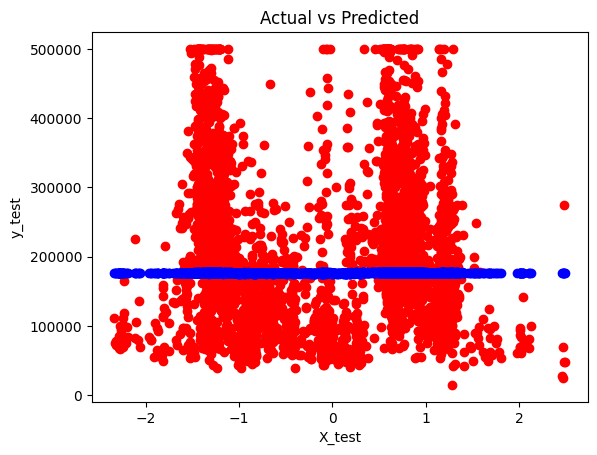

In [160]:
# Plot the predicted values against the actual values
temp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}).reset_index(drop=True)
plt.scatter(X_test[:, 0], y_test, color='red')
plt.scatter(X_test[:, 0], y_pred, color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()


In [161]:
y_pred

array([176543.86231011, 176740.35916326, 177445.06161257, ...,
       175944.20657885, 176879.42379497, 176573.32291352])

In [162]:
# Do model building without feature scaling
# train test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 1. Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# 2. Predicting the Test set results
y_pred = regressor.predict(X_test)
# 3. Evaluating the Model Performance
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error: 65492.3792179371


In [163]:
# Continue with SVR
# 1. Fitting Multiple SVR to the Training set
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train, y_train)
# 2. Predicting the Test set results
y_pred = regressor.predict(X_test)
# 3. Evaluating the Model Performance
print('Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

Mean Squared Error: 112251.00389643504


# Accuracy comparison
## Without Feature Scaling
### Linear Regression
MSE: 65492.37921793703
### SVR
MSE: 112046.02604315593

## With Feature Scaling
### Linear Regression
MSE: 65492.3792179371
### SVR
MSE: 112251.00389643504